In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
from lanefinder import Lanefinder
%matplotlib inline

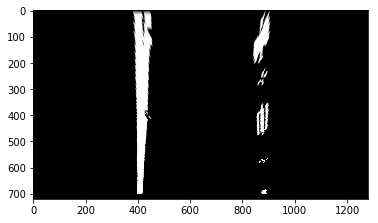

In [2]:
# Read in a thresholded image
image = mpimg.imread('../output_images/straight_lines1.jpg')
warped=image[:,:,1]
plt.imshow(warped, cmap="gray")

In [3]:
lanefinder = Lanefinder()

Initializing image processor ..
Default value of sliding window have been set
window_width = 50
window_height = 80
margin = 100
Done ...


In [4]:
window_centroids = lanefinder.find_lane_segments(warped)
print (window_centroids)

[(398, 871), (403, 874), (409, 874), (419, 875), (416, 877), (416, 870), (416, 863), (417, 871), (414, 885)]


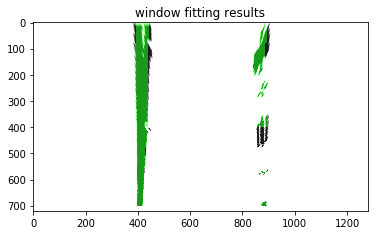

In [8]:
def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output
# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(50,80,warped,window_centroids[level][0],level)
        r_mask = window_mask(50,80,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage= np.dstack((warped, warped, warped))*255 # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()

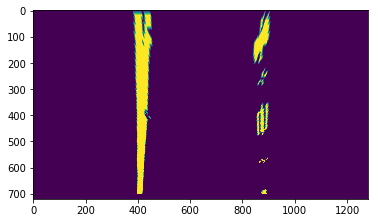

In [6]:
pt1 = window_centroids[0]
pt2 = window_centroids[1]
cv2.line(image, (404, 874), (398, 871), color=[255,0,0], thickness=10)
plt.imshow(image)

